In [1]:
# HR analytics project

Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Reading the data

In [3]:
df = pd.read_csv('HR-training.csv')

Analysing the code

In [4]:
df.shape

(54808, 13)

In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [6]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [9]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [716]:
missing_data_precentage_education = 2409/df.shape[0] * 100
missing_data_precentage_previous_rating = 4124/df.shape[0] * 100

In [717]:
print(missing_data_precentage_education)
print(missing_data_precentage_previous_rating)

4.395343745438622
7.524448985549554


So here we understood that few of the values are missing. 

Either we can delete the rows in which the values are missing or we can replace it by mean, median or mode. Also missing data percentage is very low. Here values are missing from education and previous rating, previous_rating missing values can be replaced by mean value while education should be replaced by mode.

In [718]:
df['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [719]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [720]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Checking the target class balance

C:\Users\abina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


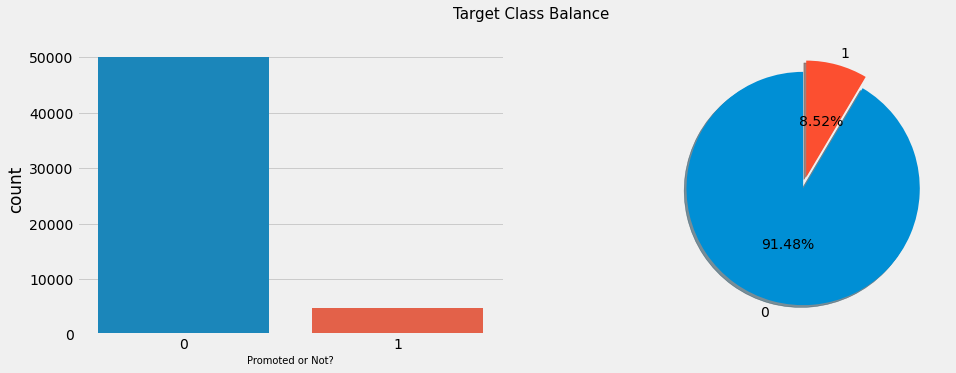

In [721]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
df['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

we can easily, see that the Target Class is Highly Imbalanced, and we must balance these classes of Target Class. Most of the Times, when we use Machine Learning Models with Imbalanced Classes, we have very poor Results which are completely biased towards the class having Higher Distribution.

Replacing missing values

In [722]:
mode = df['education'].mode()

In [723]:
df['education'].fillna(mode[0],inplace = True)

In [724]:
mean = df['previous_year_rating'].mean()

In [725]:
df['previous_year_rating'].fillna(mean,inplace = True)

In [726]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [727]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


In [728]:
y = df['is_promoted']

In [729]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


Checking for outliers

C:\Users\abina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


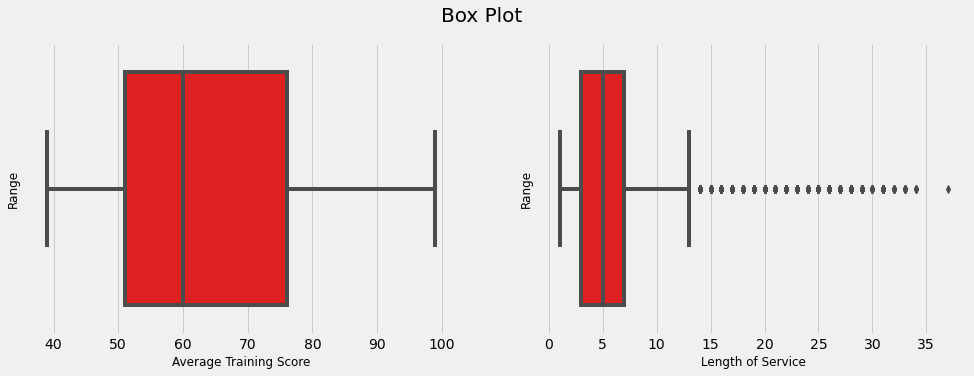

In [730]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(df['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(df['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

Checking the age of employees

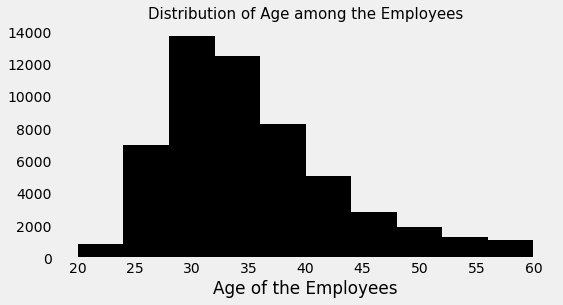

In [731]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(df['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

Checking different departments

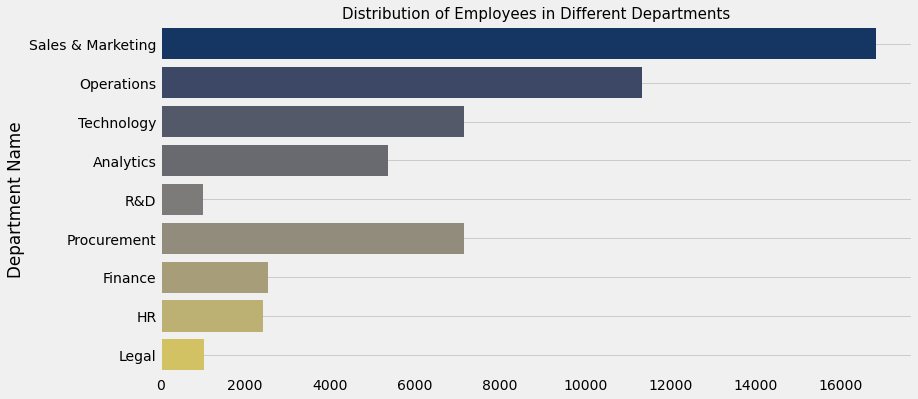

In [732]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = df['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

Feature engineering

In [733]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


In [734]:
## Lets check the categorical columns present in the data
df.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [735]:
# lets check the value counts for the education column
df['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [736]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
df['education'] = df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))


In [737]:
# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['gender'] = le.fit_transform(df['gender'])

In [738]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,3,0,sourcing,1,35,5.0,8,0,49,0
1,65141,4,region_22,2,1,other,1,30,5.0,4,0,60,0
2,7513,7,region_19,2,1,sourcing,1,34,3.0,7,0,50,0
3,2542,7,region_23,2,1,other,2,39,1.0,10,0,50,0
4,48945,8,region_26,2,1,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,region_14,2,1,sourcing,1,48,3.0,17,0,78,0
54804,74592,4,region_27,3,0,other,1,37,2.0,6,0,56,0
54805,13918,0,region_1,2,1,other,1,27,5.0,3,0,79,0
54806,13614,7,region_9,2,1,sourcing,1,29,1.0,2,0,45,0


In [739]:
x = df.drop(['employee_id', 'region', 'recruitment_channel','is_promoted'], axis = 1)

In [740]:
x

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,7,3,0,1,35,5.0,8,0,49
1,4,2,1,1,30,5.0,4,0,60
2,7,2,1,1,34,3.0,7,0,50
3,7,2,1,2,39,1.0,10,0,50
4,8,2,1,1,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...
54803,8,2,1,1,48,3.0,17,0,78
54804,4,3,0,1,37,2.0,6,0,56
54805,0,2,1,1,27,5.0,3,0,79
54806,7,2,1,1,29,1.0,2,0,45


In [741]:
# lets check whether we still have any categorical columns left after encoding
print(df.select_dtypes('object').columns)



Index(['region', 'recruitment_channel'], dtype='object')


In [742]:
x

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,7,3,0,1,35,5.0,8,0,49
1,4,2,1,1,30,5.0,4,0,60
2,7,2,1,1,34,3.0,7,0,50
3,7,2,1,2,39,1.0,10,0,50
4,8,2,1,1,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...
54803,8,2,1,1,48,3.0,17,0,78
54804,4,3,0,1,37,2.0,6,0,56
54805,0,2,1,1,27,5.0,3,0,79
54806,7,2,1,1,29,1.0,2,0,45


In [743]:
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)

Shape of the x : (54808, 9)
Shape of the y : (54808,)


In [744]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.


In [745]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int32  
 1   education             54808 non-null  int64  
 2   gender                54808 non-null  int32  
 3   no_of_trainings       54808 non-null  int64  
 4   age                   54808 non-null  int64  
 5   previous_year_rating  54808 non-null  float64
 6   length_of_service     54808 non-null  int64  
 7   awards_won?           54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 3.3 MB


In [746]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y)

In [747]:
x

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,7,3,0,1,35,5.0,8,0,49
1,4,2,1,1,30,5.0,4,0,60
2,7,2,1,1,34,3.0,7,0,50
3,7,2,1,2,39,1.0,10,0,50
4,8,2,1,1,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...
54803,8,2,1,1,48,3.0,17,0,78
54804,4,3,0,1,37,2.0,6,0,56
54805,0,2,1,1,27,5.0,3,0,79
54806,7,2,1,1,29,1.0,2,0,45


In [748]:
y_resample.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

In [749]:
print(x_resample.shape)
print(y_resample.shape)

(100280, 9)
(100280,)


In [750]:
x

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,7,3,0,1,35,5.0,8,0,49
1,4,2,1,1,30,5.0,4,0,60
2,7,2,1,1,34,3.0,7,0,50
3,7,2,1,2,39,1.0,10,0,50
4,8,2,1,1,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...
54803,8,2,1,1,48,3.0,17,0,78
54804,4,3,0,1,37,2.0,6,0,56
54805,0,2,1,1,27,5.0,3,0,79
54806,7,2,1,1,29,1.0,2,0,45


In [751]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.25, random_state = 0)

In [752]:
x_resample

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,7,3,0,1,35,5.000000,8,0,49
1,4,2,1,1,30,5.000000,4,0,60
2,7,2,1,1,34,3.000000,7,0,50
3,7,2,1,2,39,1.000000,10,0,50
4,8,2,1,1,45,3.000000,2,0,73
...,...,...,...,...,...,...,...,...,...
100275,7,3,0,1,42,5.000000,2,0,50
100276,4,2,0,1,42,4.412839,14,0,61
100277,7,2,0,1,29,3.923574,7,0,56
100278,4,2,0,1,31,5.000000,2,0,70


In [753]:
y_resample

0         0
1         0
2         0
3         0
4         0
         ..
100275    1
100276    1
100277    1
100278    1
100279    1
Name: is_promoted, Length: 100280, dtype: int64

In [754]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [755]:
# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)

Shape of the x Train : (75210, 9)
Shape of the y Train : (75210,)
Shape of the x Valid : (25070, 9)
Shape of the y Valid : (25070,)


In [756]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)


In [757]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

In [841]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators = 400, max_depth= 4, max_features=2, min_samples_leaf= 5, min_samples_split=3)
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_valid)

Training Accuracy : 0.9792048929663608
Testing Accuracy : 0.5623853211009174


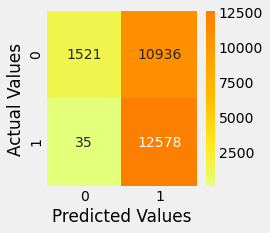

In [773]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Training Accuracy : 0.7294242786863449
Testing Accuracy : 0.7075787794176306


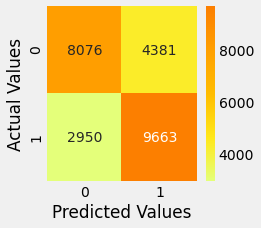

In [842]:


print("Training Accuracy :", model1.score(x_train, y_train))
print("Testing Accuracy :", model1.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [844]:
cr = classification_report(y_valid, y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.65      0.69     12457
           1       0.69      0.77      0.72     12613

    accuracy                           0.71     25070
   macro avg       0.71      0.71      0.71     25070
weighted avg       0.71      0.71      0.71     25070



In [843]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.12      0.22     12457
           1       0.53      1.00      0.70     12613

    accuracy                           0.56     25070
   macro avg       0.76      0.56      0.46     25070
weighted avg       0.75      0.56      0.46     25070

